In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
appdata = pd.read_csv("application_data.csv")
prevdata = pd.read_csv("previous_application.csv")

In [3]:
pd.set_option("display.max_rows",500)

# Dealing with Duplicate records 

In [4]:
#check or Duplicates in application_data
appdata.duplicated().sum()

0

In [5]:
#Checking Data Type
appdata.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


# 🔻 Dealing with Null Values

In [6]:
appdata.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
Checking_Null = appdata.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE']

In [8]:
(Checking_Null.isnull().sum()/len(appdata))*100

APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59

In [9]:
appdata.shape

(307511, 122)

In [10]:
# As we can see almost 50% or More vales of the these data are missing for these columns.
# So imputing specially for EDA is not good here, so i will remove these Columns from the Dataset

appdata.drop(appdata.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns,axis = 1, inplace = True )

In [11]:
appdata.shape

(307511, 75)

In [12]:
#looking in the column description sheet, I found columns FLAG_DOCUMENT_2 - 21 are also not good, since there is not much information which kind of documents are these
#so i will remove these columns as well for my analysis
appdata.drop(appdata.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns,axis = 1, inplace = True )

In [13]:
appdata.shape

(307511, 55)

In [14]:
60965/307511*100

19.825307062186393

In [15]:
appdata.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [16]:
#OWN_CAR_AGE, EXT_SOURCE_1 , EXT_SOURCE_3 also have missing value more than 40%
appdata.drop("OWN_CAR_AGE",axis = 1, inplace = True )
appdata.drop("EXT_SOURCE_1",axis = 1, inplace = True )

In [17]:
appdata.drop("EXT_SOURCE_3",axis = 1, inplace = True )

In [18]:
appdata.shape

(307511, 52)

In [19]:
appdata.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [20]:
appdata.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [21]:
appdata.AMT_ANNUITY.dtypes

dtype('float64')

In [22]:
appdata.AMT_ANNUITY.median()

24903.0

In [23]:
appdata.AMT_ANNUITY = appdata.AMT_ANNUITY.fillna(appdata.AMT_ANNUITY.median())

In [24]:
appdata.AMT_ANNUITY.isnull().sum()

0

In [25]:
appdata.AMT_GOODS_PRICE=appdata.AMT_GOODS_PRICE.fillna(appdata.AMT_GOODS_PRICE.median())

In [26]:
appdata.AMT_GOODS_PRICE.isnull().sum()

0

In [27]:
#Categorical Variable 
appdata.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [28]:
appdata.NAME_TYPE_SUITE=appdata.NAME_TYPE_SUITE.fillna(appdata.NAME_TYPE_SUITE.mode()[0])

In [29]:
appdata.NAME_TYPE_SUITE.isnull().sum()

0

In [30]:
# Though there are 31% misiing value in OCCUPATION_TYPE  but it's an important coloumn so i will create new cateogry "Missing" for null values 
#Being 30% null we also can't use Mode here to impute 

appdata.OCCUPATION_TYPE.isnull().sum()/len(appdata)

0.31345545362604915

In [31]:
appdata.OCCUPATION_TYPE = appdata.OCCUPATION_TYPE.fillna("Missing")

In [32]:
appdata.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [33]:
appdata.EXT_SOURCE_2.isnull().sum()

660

In [34]:
appdata.CNT_FAM_MEMBERS = appdata.CNT_FAM_MEMBERS.fillna(appdata.CNT_FAM_MEMBERS.median())

In [35]:
appdata.EXT_SOURCE_2 = appdata.EXT_SOURCE_2.fillna(appdata.EXT_SOURCE_2.median())

In [36]:
appdata.OBS_30_CNT_SOCIAL_CIRCLE = appdata.OBS_30_CNT_SOCIAL_CIRCLE.fillna(appdata.OBS_30_CNT_SOCIAL_CIRCLE.median())
appdata.DEF_30_CNT_SOCIAL_CIRCLE = appdata.DEF_30_CNT_SOCIAL_CIRCLE.fillna(appdata.DEF_30_CNT_SOCIAL_CIRCLE.median())
appdata.OBS_60_CNT_SOCIAL_CIRCLE = appdata.OBS_60_CNT_SOCIAL_CIRCLE.fillna(appdata.OBS_60_CNT_SOCIAL_CIRCLE.median())

appdata.DEF_60_CNT_SOCIAL_CIRCLE = appdata.DEF_60_CNT_SOCIAL_CIRCLE.fillna(appdata.DEF_60_CNT_SOCIAL_CIRCLE.median())
appdata.DAYS_LAST_PHONE_CHANGE = appdata.DAYS_LAST_PHONE_CHANGE.fillna(appdata.DAYS_LAST_PHONE_CHANGE.median())

appdata.AMT_REQ_CREDIT_BUREAU_HOUR = appdata.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(appdata.AMT_REQ_CREDIT_BUREAU_HOUR.median())
appdata.AMT_REQ_CREDIT_BUREAU_DAY = appdata.AMT_REQ_CREDIT_BUREAU_DAY.fillna(appdata.AMT_REQ_CREDIT_BUREAU_DAY.median())
appdata.AMT_REQ_CREDIT_BUREAU_WEEK = appdata.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(appdata.AMT_REQ_CREDIT_BUREAU_WEEK.median())
appdata.AMT_REQ_CREDIT_BUREAU_MON = appdata.AMT_REQ_CREDIT_BUREAU_MON.fillna(appdata.AMT_REQ_CREDIT_BUREAU_MON.median())
appdata.AMT_REQ_CREDIT_BUREAU_QRT = appdata.AMT_REQ_CREDIT_BUREAU_QRT.fillna(appdata.AMT_REQ_CREDIT_BUREAU_QRT.median())
appdata.AMT_REQ_CREDIT_BUREAU_YEAR = appdata.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(appdata.AMT_REQ_CREDIT_BUREAU_YEAR.median())





In [37]:
appdata.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## Now we will filteration on the second data set 

In [38]:
prevdata.duplicated().sum()

0

In [39]:
prevdata.shape

(1670214, 37)

In [40]:
(prevdata.isnull().sum()/len(prevdata))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [41]:
# More Than 40% of the data is missing so these won't be good for further analysis so i have removed these.  
prevdata.drop("AMT_DOWN_PAYMENT",axis = 1, inplace = True )
prevdata.drop("NAME_TYPE_SUITE",axis = 1, inplace = True )
prevdata.drop(prevdata.loc[:,'RATE_DOWN_PAYMENT':'RATE_INTEREST_PRIVILEGED'].columns,axis = 1, inplace = True )
prevdata.drop(prevdata.loc[:,'DAYS_FIRST_DRAWING':'NFLAG_INSURED_ON_APPROVAL'].columns,axis = 1, inplace = True )


In [42]:
(prevdata.isnull().sum()/len(prevdata))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [43]:
prevdata.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [44]:
prevdata.AMT_ANNUITY = prevdata.AMT_ANNUITY.fillna(prevdata.AMT_ANNUITY.median())
prevdata.AMT_GOODS_PRICE = prevdata.AMT_GOODS_PRICE.fillna(prevdata.AMT_GOODS_PRICE.median())
prevdata.CNT_PAYMENT = prevdata.CNT_PAYMENT.fillna(prevdata.CNT_PAYMENT.median())


In [45]:
prevdata.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [46]:
prevdata.AMT_CREDIT = prevdata.AMT_CREDIT.fillna(prevdata.AMT_CREDIT.median())
prevdata.PRODUCT_COMBINATION = prevdata.PRODUCT_COMBINATION.fillna(prevdata.PRODUCT_COMBINATION.mode()[0])

In [47]:
prevdata.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [48]:
prevdata.shape

(1670214, 26)

# 🔺 All The Missing value are handled now

# 🔻Lets start the analysis

Text(0.5, 1.0, 'Loan Demographic')

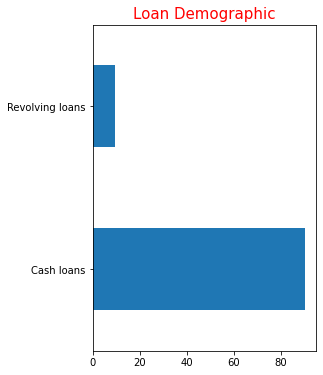

In [49]:
#Let's Check the Demographic interset loan
plt.figure(figsize =[4,6])
Demo = (appdata.NAME_CONTRACT_TYPE.value_counts()/len(appdata)*100)
Demo.plot.barh()
plt.title("Loan Demographic", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})


Text(0.5, 1.0, 'Gender based Demographic')

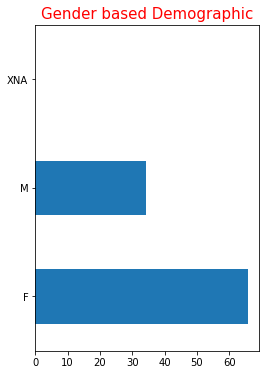

In [50]:
plt.figure(figsize =[4,6])
Demo = (appdata.CODE_GENDER.value_counts()/len(appdata)*100)
Demo.plot.barh()
plt.title("Gender based Demographic", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})


In [51]:
#Handling XNA
appdata.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [52]:
#for 4 values i am replacing XNA with MODE since delection of record is not a good idea here 
appdata.CODE_GENDER.mode()[0]

'F'

In [53]:
appdata.CODE_GENDER.replace(to_replace="XNA",value=appdata.CODE_GENDER.mode()[0],inplace=True)

Text(0.5, 1.0, 'Gender based Demographic')

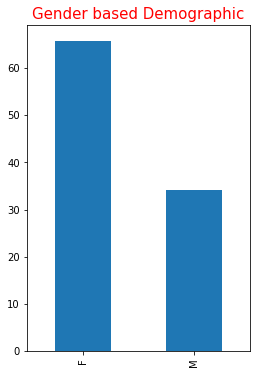

In [54]:
plt.figure(figsize =[4,6])
Demo = (appdata.CODE_GENDER.value_counts()/len(appdata)*100)
Demo.plot.bar()
plt.title("Gender based Demographic", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})


In [55]:
demo1=((appdata.groupby(by= ["CODE_GENDER","NAME_CONTRACT_TYPE"])["NAME_CONTRACT_TYPE"].count())/len(appdata))*100
demo1

CODE_GENDER  NAME_CONTRACT_TYPE
F            Cash loans            59.445028
             Revolving loans        6.390666
M            Cash loans            31.033687
             Revolving loans        3.130620
Name: NAME_CONTRACT_TYPE, dtype: float64

In [56]:
#Check people with payment diffculty

appdata.TARGET.value_counts()/len(appdata)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

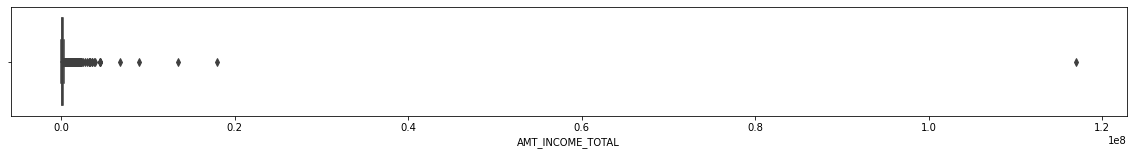

In [57]:
# there is Client Income column as well which is always a good factor in loan case study
plt.figure(figsize =[20,2])
sns.boxplot(appdata.AMT_INCOME_TOTAL)

In [58]:
#checking the Maximum Income
appdata.AMT_INCOME_TOTAL.max()

117000000.0

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

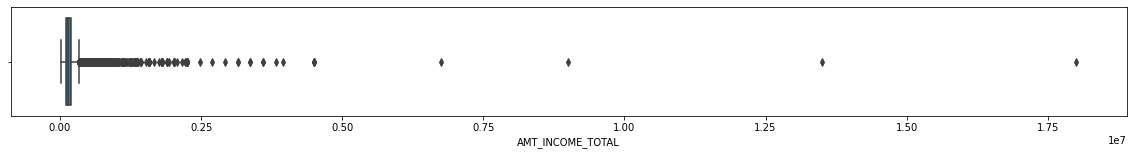

In [59]:
checkwithmax = appdata[appdata.AMT_INCOME_TOTAL<117000000]
plt.figure(figsize =[20,2])
sns.boxplot(checkwithmax.AMT_INCOME_TOTAL)

#there are still outliers

In [60]:
#Checking the Record above 25000000
checkwith25 = appdata[appdata.AMT_INCOME_TOTAL>2500000]
checkwith25.shape

(19, 52)

In [61]:
#Clearly it's clear that above 2500000 there is not much data rather than deleting record i am capping with iqr 
appdata.AMT_INCOME_TOTAL.quantile([.25,.75])


0.25    112500.0
0.75    202500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [62]:
#IQR
202500-112500

90000

In [63]:
max = 90000*1.5 + 202500
max

337500.0

In [64]:
appdata.AMT_INCOME_TOTAL=np.where(appdata.AMT_INCOME_TOTAL>337500,337500,appdata.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

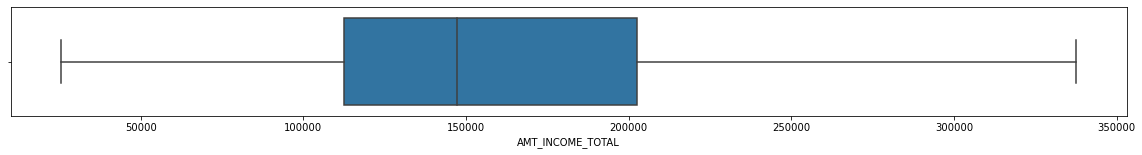

In [65]:
plt.figure(figsize =[20,2])
sns.boxplot(appdata.AMT_INCOME_TOTAL)

#Now we can see outliers are handled now

In [66]:
appdata.shape

(307511, 52)

In [67]:
appdata.AMT_INCOME_TOTAL.min()

25650.0

In [261]:
appdata["Income_range"] = pd.cut(appdata.AMT_INCOME_TOTAL,[0,100000,150000,200000,250000,300000,400000],["below 100000","100000-150000","150000-200000","200000-250000","250000-300000","more than 300000"])

Text(0, 0.5, 'Income_range')

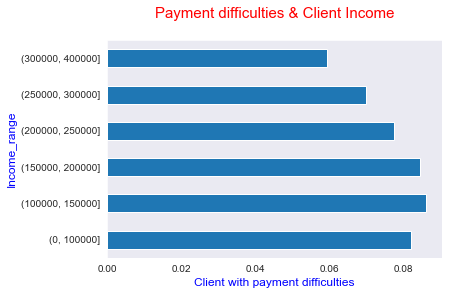

In [263]:
appdata.groupby(by= "Income_range")["TARGET"].mean().plot.barh()
plt.title("Payment difficulties & Client Income\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.ylabel("Income_range",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})


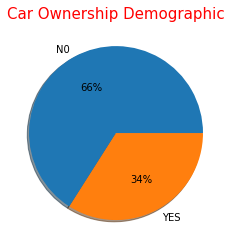

In [69]:
Vehicle = (appdata.FLAG_OWN_CAR.value_counts()/len(appdata)*100)
plt.pie(Vehicle,labels = ["N0","YES"] ,autopct = '%.f%%',shadow=True)
plt.title("Car Ownership Demographic", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.show()

Text(0.5, 0, 'Vehicle ownership')

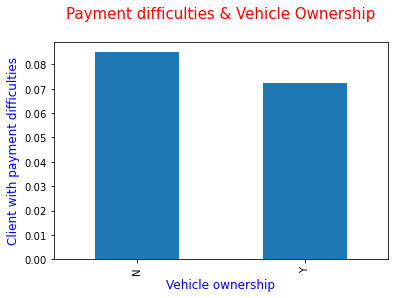

In [70]:
appdata.groupby(by= "FLAG_OWN_CAR")["TARGET"].mean().plot.bar()
plt.title("Payment difficulties & Vehicle Ownership\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Vehicle ownership",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [71]:
appdata.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

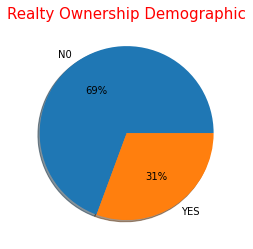

In [72]:
REALTY = (appdata.FLAG_OWN_REALTY.value_counts()/len(appdata)*100)
plt.pie(REALTY,labels = ["N0","YES"] ,autopct = '%.f%%',shadow=True)
plt.title("Realty Ownership Demographic", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.show()

Text(0.5, 0, 'Realty ownership')

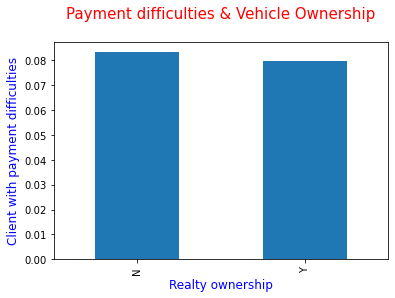

In [73]:
appdata.groupby(by= "FLAG_OWN_REALTY")["TARGET"].mean().plot.bar()
plt.title("Payment difficulties & Vehicle Ownership\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Realty ownership",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

#Here we saw there is not much diffrence w.r.t Payment difficulties 

In [74]:
appdata.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [75]:
#capping to 6
k=appdata[appdata.CNT_CHILDREN<=6]
k

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Client with payment difficulties')

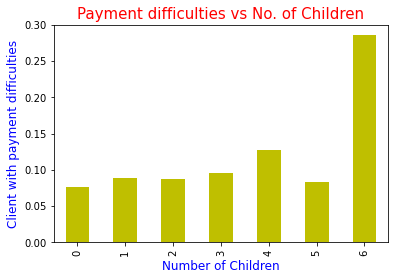

In [76]:
k.groupby(by= "CNT_CHILDREN")["TARGET"].mean().plot.bar(color = "y")
plt.title("Payment difficulties vs No. of Children", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.xlabel("Number of Children",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})


Text(0, 0.5, 'Income of the client')

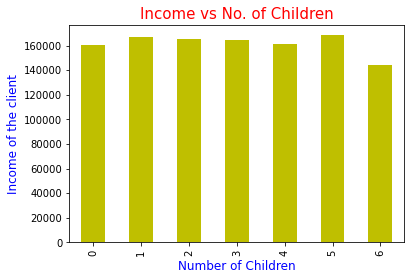

In [77]:
k.groupby(by= "CNT_CHILDREN")["AMT_INCOME_TOTAL"].mean().plot.bar(color = "y")
plt.title("Income vs No. of Children", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.xlabel("Number of Children",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.ylabel("Income of the client",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})


In [78]:
appdata.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [79]:
appdata.NAME_INCOME_TYPE.value_counts()/len(appdata)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

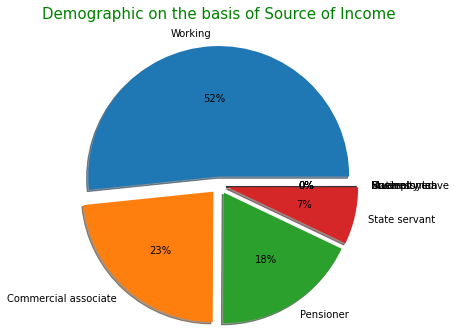

In [80]:
incomesource = appdata.NAME_INCOME_TYPE.value_counts()
plt.pie(incomesource,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],radius = 1.5,labels = ["Working","Commercial associate","Pensioner","State servant","Unemployed","Student","Businessman","Maternity leave"] ,autopct = '%.f%%',shadow=True,)
plt.title("Demographic on the basis of Source of Income\n\n\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'Green'})

plt.show()

<Figure size 1440x720 with 0 Axes>

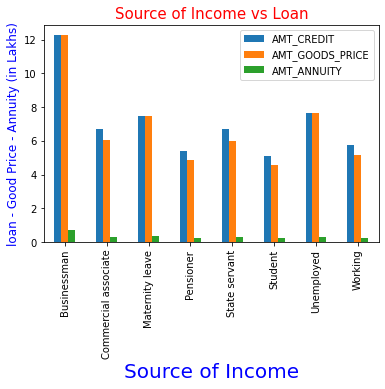

In [81]:
plt.figure(figsize=[20,10])
loan = (appdata.groupby(by="NAME_INCOME_TYPE").agg({"AMT_CREDIT":"mean","AMT_GOODS_PRICE":"mean","AMT_ANNUITY":"mean"})/100000)
loan.plot.bar()

plt.title("Source of Income vs Loan", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.xlabel("Source of Income",fontdict={'fontsize':20,'fontweight':5,'color' : 'Blue'})
plt.ylabel("loan - Good Price - Annuity (in Lakhs)",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

plt.show()

Text(0.5, 0, 'Source of Income')

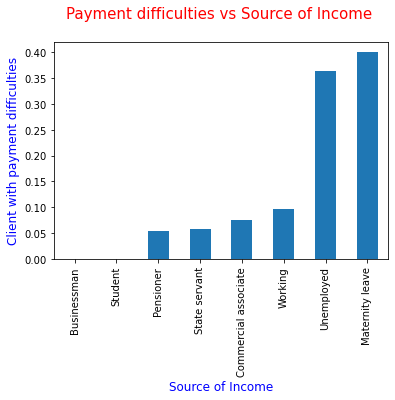

In [82]:
appdata.groupby(by= "NAME_INCOME_TYPE")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties vs Source of Income \n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Source of Income",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})


In [83]:
appdata.NAME_EDUCATION_TYPE.value_counts()


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Text(0.5, 0, 'Client with payment difficulties')

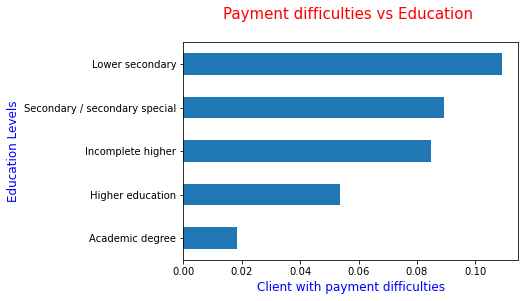

In [84]:
appdata.groupby(by= "NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values().plot.barh()
plt.title("Payment difficulties vs Education \n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Education Levels",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [85]:
appdata.NAME_FAMILY_STATUS.value_counts()


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Text(0.5, 0, 'Client with payment difficulties')

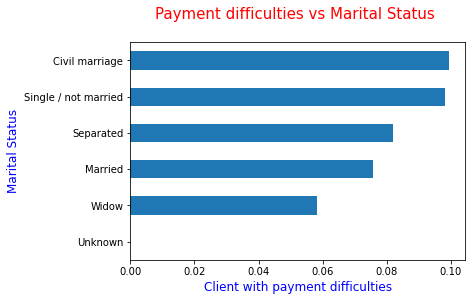

In [86]:
appdata.groupby(by= "NAME_FAMILY_STATUS")["TARGET"].mean().sort_values().plot.barh()
plt.title("Payment difficulties vs Marital Status \n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Marital Status",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [87]:
edu_martial = appdata.pivot_table(index="NAME_EDUCATION_TYPE",columns="NAME_FAMILY_STATUS",values = "TARGET",aggfunc="mean")
edu_martial

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_EDUCATION_TYPE,,,,,,
Academic degree,0.000000,0.018868,0.000000,0.034483,NaN,0.000000
Higher education,0.066196,0.049646,0.057346,0.062049,0.0,0.048094
Incomplete higher,0.092481,0.079144,0.086643,0.094143,NaN,0.063584
Lower secondary,0.135922,0.102961,0.138249,0.132988,0.0,0.067961
Secondary / secondary special,0.108322,0.084136,0.089904,0.113243,NaN,0.059666


Text(0.5, 15.0, 'Education')

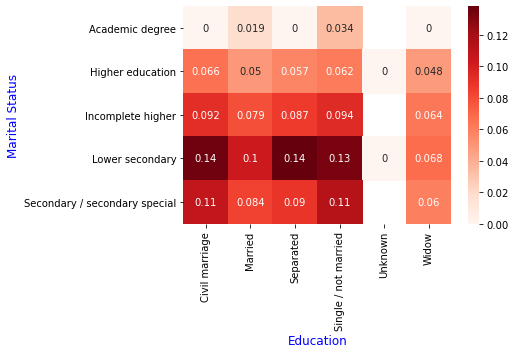

In [88]:
sns.heatmap(edu_martial,cmap="Reds",annot=True)
plt.ylabel("Marital Status",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Education",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [89]:
martial_house = appdata.pivot_table(index="NAME_HOUSING_TYPE",columns="NAME_FAMILY_STATUS",values = "TARGET",aggfunc="mean")
martial_house

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_HOUSING_TYPE,,,,,,
Co-op apartment,0.066667,0.061947,0.151515,0.112319,NaN,0.037037
House / apartment,0.096285,0.073598,0.078123,0.094592,0.0,0.057267
Municipal apartment,0.103565,0.080332,0.088819,0.097600,0.0,0.066158
Office apartment,0.096916,0.061921,0.063584,0.068063,NaN,0.056075
Rented apartment,0.136364,0.116082,0.141176,0.130048,NaN,0.074468
With parents,0.135102,0.113249,0.117424,0.116261,NaN,0.111111


Text(0.5, 15.0, 'Marital Status')

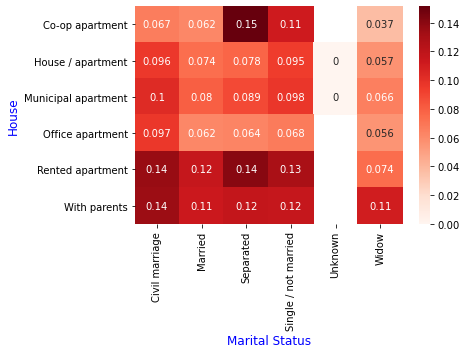

In [90]:
sns.heatmap(martial_house,cmap="Reds",annot=True)
plt.ylabel("House",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Marital Status",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [91]:
edu_house = appdata.pivot_table(index="NAME_HOUSING_TYPE",columns="NAME_EDUCATION_TYPE",values = "TARGET",aggfunc="mean")
edu_house

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_HOUSING_TYPE,,,,,
Co-op apartment,0.000000,0.081800,0.050000,0.000000,0.081996
House / apartment,0.020408,0.052062,0.081281,0.105115,0.086323
Municipal apartment,0.000000,0.057464,0.081433,0.122744,0.089675
Office apartment,0.000000,0.041199,0.030928,0.121951,0.078209
Rented apartment,0.000000,0.063970,0.115385,0.126582,0.142356
With parents,0.000000,0.073232,0.110132,0.148649,0.135323


Text(0.5, 15.0, 'Education')

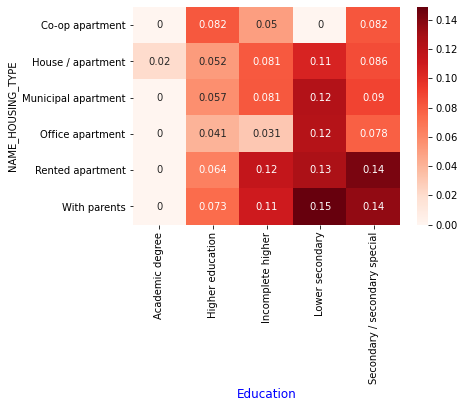

In [92]:
sns.heatmap(edu_house,cmap="Reds",annot=True)
# plt.ylabel("House",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Education",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [93]:
appdata.NAME_TYPE_SUITE.value_counts()


Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [245]:
(appdata.groupby(by ="ORGANIZATION_TYPE")["TARGET"].mean()).sort_values(ascending = False)

ORGANIZATION_TYPE
Transport: type 3         0.157540
Industry: type 13         0.134328
Industry: type 8          0.125000
Restaurant                0.117062
Construction              0.116798
Cleaning                  0.111538
Industry: type 1          0.110683
Industry: type 3          0.106162
Realtor                   0.106061
Agriculture               0.104727
Trade: type 3             0.103379
Self-employed             0.101739
Industry: type 4          0.101482
Security                  0.099784
Trade: type 7             0.094496
Business Entity Type 3    0.092996
Transport: type 4         0.092812
Mobile                    0.091483
Trade: type 1             0.089080
Industry: type 11         0.086538
Business Entity Type 2    0.085284
Postal                    0.084376
Advertising               0.081585
Business Entity Type 1    0.081384
Industry: type 7          0.080337
Housing                   0.079446
Legal Services            0.078689
Transport: type 2         0.078040
Ot

In [98]:
#Similar kind of analysis we did above
appdata.NAME_TYPE_SUITE.value_counts()


Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Text(0.5, 0, 'Client with payment difficulties')

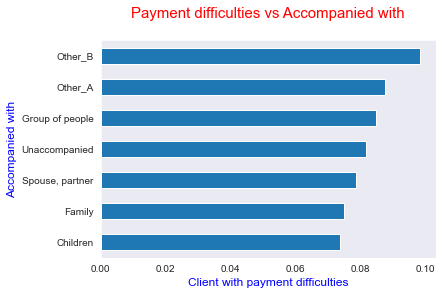

In [99]:
sns.set_style("dark")
appdata.groupby(by= "NAME_TYPE_SUITE")["TARGET"].mean().sort_values().plot.barh()
plt.title("Payment difficulties vs Accompanied with\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Accompanied with",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [100]:
#REGION_POPULATION_RELATIVE
appdata.REGION_POPULATION_RELATIVE.max()

0.072508

In [101]:
#REGION_POPULATION_RELATIVE, i will use binning method for obersvation

appdata["Normalized_POPULATION"]=pd.qcut(appdata.REGION_POPULATION_RELATIVE,[0,0.2,0.4,0.6,0.8,1],["less than 0.2","0.2-0.4","0.4-0.6","0.6-0.8","more than 0.8"])


In [102]:
appdata.Normalized_POPULATION.value_counts()

0.6-0.8          64025
less than 0.2    63155
0.4-0.6          63143
0.2-0.4          60969
more than 0.8    56219
Name: Normalized_POPULATION, dtype: int64

Text(0.5, 0, 'Client with payment difficulties')

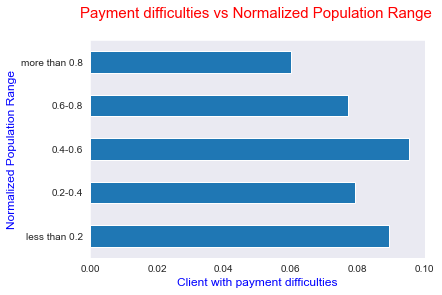

In [166]:
sns.set_style("dark")
appdata.groupby(by= "Normalized_POPULATION")["TARGET"].mean().plot.barh()
plt.title("Payment difficulties vs Normalized Population Range \n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.ylabel("Normalized Population Range",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})

In [104]:
appdata.DAYS_BIRTH.value_counts()


-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
          ..
-24988     1
-7829      1
-25179     1
-25070     1
-7720      1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [105]:
appdata["Client_age"] = appdata.DAYS_BIRTH.apply(lambda x : round(abs(x/365),0))


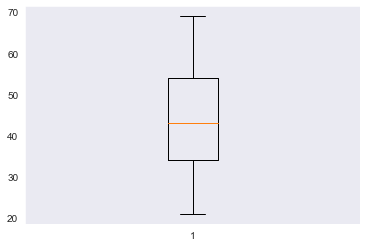

In [106]:
plt.boxplot(appdata.Client_age)
plt.show()

In [107]:
appdata.Client_age.max()

69.0

In [265]:
appdata["age_group"]= pd.cut(appdata.Client_age,[20,40,50,60,100],["below 20","20-40","40-50","50-60","above 60"])

Text(0, 0.5, 'Age_Groups')

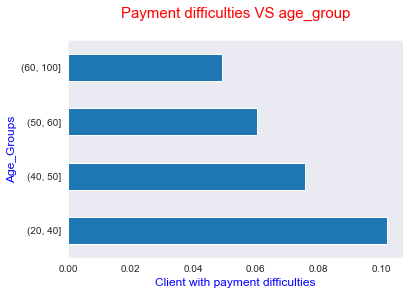

In [267]:
appdata.groupby(by= "age_group")["TARGET"].mean().plot.barh()
plt.title("Payment difficulties VS age_group\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.ylabel("Age_Groups",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})


In [109]:
#DAYS_EMPLOYED

appdata.DAYS_EMPLOYED.value_counts()



 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [110]:
55374/len(appdata)*100

#this 18% of data wrongly input we will make it aa 0 days
#and make the change in the main column itself using np.where

18.00716071945394

In [111]:
appdata.DAYS_EMPLOYED = np.where(appdata.DAYS_EMPLOYED<0,round(abs(appdata.DAYS_EMPLOYED)/365,0),0)

In [126]:
appdata.DAYS_EMPLOYED.astype("Int64")


0          2
1          3
2          1
3          8
4          8
          ..
307506     1
307507     0
307508    22
307509    13
307510     3
Name: DAYS_EMPLOYED, Length: 307511, dtype: Int64

In [258]:
appdata["working_time"] = pd.cut(appdata.DAYS_EMPLOYED,[0,12,24,36,50],["below 12yrs","12-24","24-36","above 36yrs"])

Text(0, 0.5, 'Working Years Group')

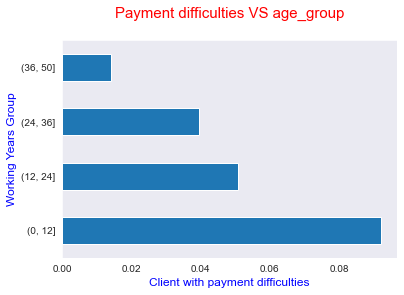

In [269]:
appdata.groupby(by= "working_time")["TARGET"].mean().plot.barh()
plt.title("Payment difficulties VS age_group\n", fontdict = {'fontsize':15,'fontweight':5,'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})
plt.ylabel("Working Years Group",fontdict={'fontsize':12,'fontweight':5,'color' : 'Blue'})


In [113]:
#It's 

appdata["REGISTRATION"] = appdata.DAYS_REGISTRATION.apply(lambda x : round(abs(x/365),0))

#Similarly as above we can do same using pd.qcut 

In [114]:
#DAYS_ID_PUBLISH

appdata["change_id"] = appdata.DAYS_ID_PUBLISH.apply(lambda x : round(abs(x/365),0))



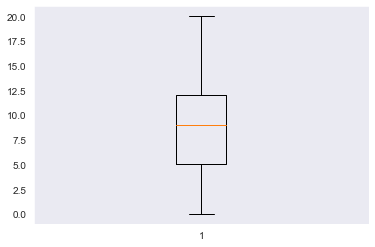

In [115]:
plt.boxplot(appdata.change_id)
plt.show()

In [256]:
appdata["change_id"]

0          6.0
1          1.0
2          7.0
3          7.0
4          9.0
          ... 
307506     5.0
307507    11.0
307508    14.0
307509     3.0
307510     1.0
Name: change_id, Length: 307511, dtype: float64

In [260]:
appdata["changed_id"] = pd.cut(appdata["change_id"],[0,5,10,15,20],["below 5","5-10","10-15","above 15"])

Text(0, 0.5, 'Changed in Years_Group ')

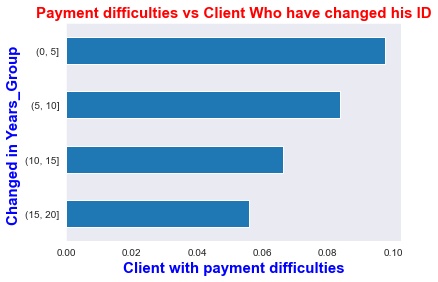

In [274]:
appdata.groupby(by= "changed_id")["TARGET"].mean().sort_values().plot.barh()
plt.title("Payment difficulties vs Client Who have changed his ID", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("Changed in Years_Group ",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [151]:
appdata.FLAG_MOBIL.value_counts(normalize=True)*100
#Nothing to analysis almost 100% of client provided mobile number

1    99.999675
0     0.000325
Name: FLAG_MOBIL, dtype: float64

In [152]:
#FLAG_EMP_PHONE
appdata.FLAG_EMP_PHONE.value_counts(normalize=True)*100


1    81.988937
0    18.011063
Name: FLAG_EMP_PHONE, dtype: float64

([<matplotlib.axis.XTick at 0x13e41ca5d60>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

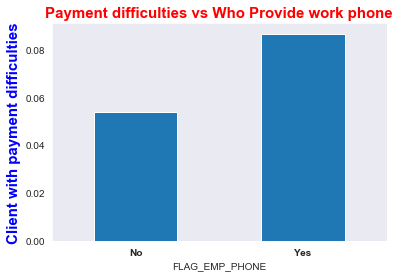

In [227]:
appdata.groupby(by= "FLAG_EMP_PHONE")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties vs Who Provide work phone", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
# plt.xlabel("0 is No or 1 is Yes",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xticks(ticks=[0,1],labels=["No","Yes"],rotation=360,fontweight = "bold")


In [153]:

appdata.FLAG_WORK_PHONE.value_counts(normalize=True)*100

0    80.063152
1    19.936848
Name: FLAG_WORK_PHONE, dtype: float64

([<matplotlib.axis.XTick at 0x13e41c52670>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

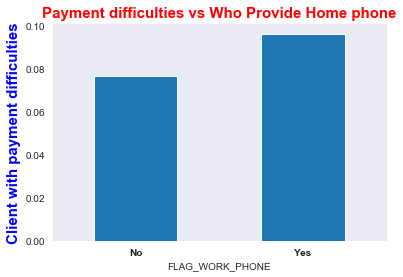

In [225]:
appdata.groupby(by= "FLAG_WORK_PHONE")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties vs Who Provide Home phone", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
# plt.xlabel("0 is No or 1 is Yes",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xticks(ticks=[0,1],labels=["No","Yes"],rotation=360,fontweight = "bold")


In [154]:

appdata.FLAG_CONT_MOBILE.value_counts(normalize=True)*100
#Nothing to analysis more than 99% of client mobiles were reachable

1    99.81334
0     0.18666
Name: FLAG_CONT_MOBILE, dtype: float64

In [167]:
appdata.FLAG_PHONE.value_counts(normalize=True)*100


0    71.893363
1    28.106637
Name: FLAG_PHONE, dtype: float64

Text(0, 0.5, 'Client with payment difficulties')

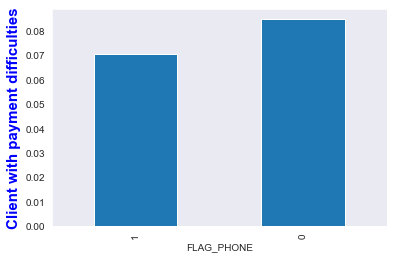

In [170]:
appdata.groupby(by= "FLAG_PHONE")["TARGET"].mean().sort_values().plot.bar()
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [174]:
appdata.FLAG_EMAIL.value_counts(normalize=True)*100
#Nothing to analysis almost 95% of clients had provided mail id

0    94.328008
1     5.671992
Name: FLAG_EMAIL, dtype: float64

In [178]:
#CNT_FAM_MEMBERS
appdata.CNT_FAM_MEMBERS.value_counts(normalize=True)*100


2.0     51.497020
1.0     22.063276
3.0     17.105404
4.0      8.031257
5.0      1.131016
6.0      0.132678
7.0      0.026341
8.0      0.006504
9.0      0.001951
10.0     0.000976
16.0     0.000650
14.0     0.000650
20.0     0.000650
12.0     0.000650
15.0     0.000325
11.0     0.000325
13.0     0.000325
Name: CNT_FAM_MEMBERS, dtype: float64

Text(0.5, 0, 'Number of Member in Family')

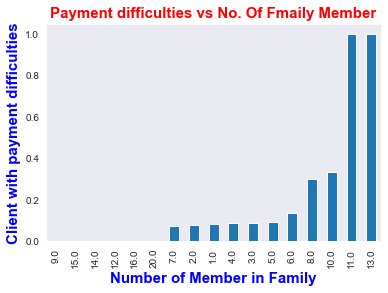

In [188]:
appdata.groupby(by= "CNT_FAM_MEMBERS")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties vs No. Of Fmaily Member", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Number of Member in Family",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})

#result is Same as above family member column higher the family member, more the chances of client to turn into defaulter


In [189]:
#REGION_RATING_CLIENT

appdata.REGION_RATING_CLIENT.value_counts(normalize=True)


2    0.738133
3    0.157165
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64

Text(0.5, 0, 'Region rating')

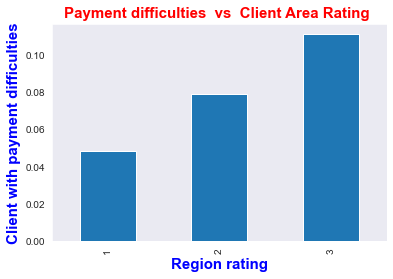

In [194]:
appdata.groupby(by= "REGION_RATING_CLIENT")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties  vs  Client Area Rating ", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Region rating",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


Text(0.5, 0, 'Region rating as per Our Dataset')

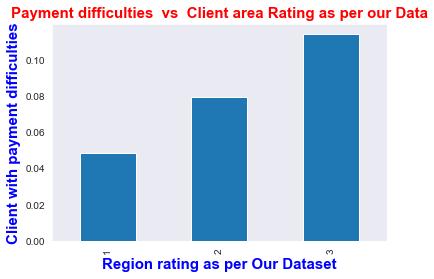

In [193]:
#REGION_RATING_CLIENT_W_CITY
appdata.groupby(by= "REGION_RATING_CLIENT_W_CITY")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties  vs  Client area Rating as per our Data", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Region rating as per Our Dataset",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


Text(0.5, 0, 'Client with payment difficulties')

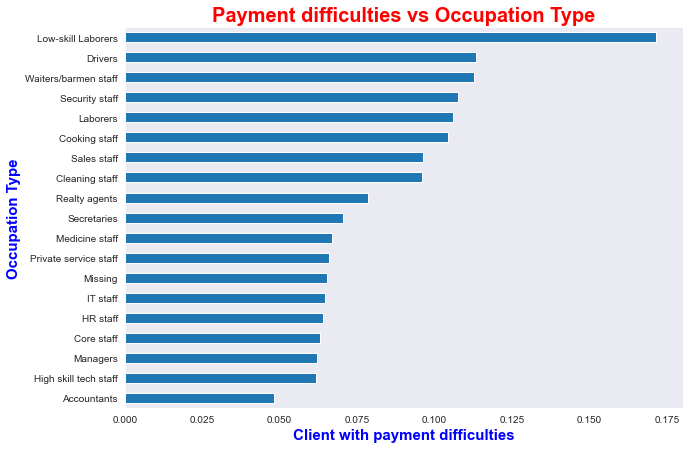

In [146]:
appdata.OCCUPATION_TYPE
plt.figure(figsize=[10,7])
appdata.groupby(by= "OCCUPATION_TYPE")["TARGET"].mean().sort_values().plot.barh()
plt.title("Payment difficulties vs Occupation Type", fontdict = {'fontsize':20,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Occupation Type",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})

In [150]:
appdata.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True)*100
#Nothing to analysis in morethan 95% of data client povided the same address  

0    98.485583
1     1.514417
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

In [195]:
#WEEKDAY_APPR_PROCESS_START

appdata.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)*100


TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

Text(0, 0.5, 'Client with payment difficulties')

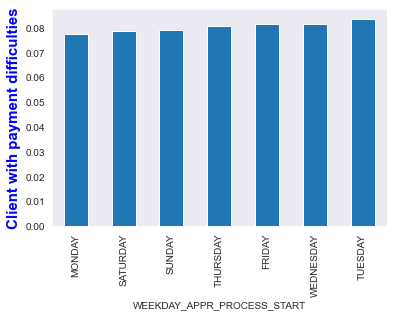

In [197]:
appdata.groupby(by= "WEEKDAY_APPR_PROCESS_START")["TARGET"].mean().sort_values().plot.bar()
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})

#We find find any constructive stats from here 


In [199]:
#HOUR_APPR_PROCESS_START

appdata.HOUR_APPR_PROCESS_START.value_counts(normalize=True)*100


10    12.266878
11    12.106559
12    11.132285
13    10.067607
14     9.001954
9      8.905047
15     8.077435
16     6.629031
8      4.919174
17     4.845355
7      2.969325
18     2.942659
6      1.899769
19     1.251337
5      1.183047
4      0.679650
3      0.399986
20     0.388929
21     0.131703
2      0.099183
22     0.048779
1      0.027966
23     0.013333
0      0.013008
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [201]:
#REG_REGION_NOT_LIVE_REGION
appdata.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True)

#Nothing to analysis, more than 98% of clients address info is same

0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

In [204]:
#REG_REGION_NOT_WORK_REGION

appdata.REG_REGION_NOT_WORK_REGION.value_counts(normalize=True)*100

#Nothing to analysis-same as above

0    94.923108
1     5.076892
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

In [205]:
#LIVE_REGION_NOT_WORK_REGION
appdata.LIVE_REGION_NOT_WORK_REGION.value_counts(normalize=True)*100

#Nothing to analysis-same as above

0    95.934129
1     4.065871
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

In [206]:
#REG_CITY_NOT_LIVE_CITY

appdata.REG_CITY_NOT_LIVE_CITY.value_counts(normalize=True)*100

#Nothing to analysis-same as above

0    92.182719
1     7.817281
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

In [207]:
#REG_CITY_NOT_WORK_CITY

appdata.REG_CITY_NOT_WORK_CITY.value_counts(normalize=True)*100



0    76.954646
1    23.045354
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

([<matplotlib.axis.XTick at 0x13e28a3f2e0>,
 [Text(0, 0, 'Same'), Text(1, 0, 'Different')])

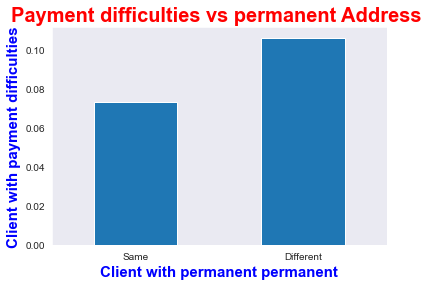

In [217]:
appdata.groupby(by= "REG_CITY_NOT_WORK_CITY")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties vs permanent Address ", fontdict = {'fontsize':20,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Client with permanent permanent",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xticks(ticks=[0,1],labels=["Same","Different"],rotation=360)


In [216]:
#LIVE_CITY_NOT_WORK_CITY
appdata.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize=True)


0    0.820445
1    0.179555
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

([<matplotlib.axis.XTick at 0x13e41cfa3a0>,
 [Text(0, 0, 'Same'), Text(1, 0, 'Different')])

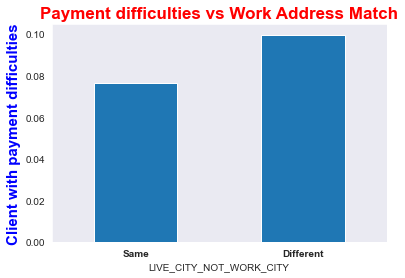

In [229]:
appdata.groupby(by= "LIVE_CITY_NOT_WORK_CITY")["TARGET"].mean().sort_values().plot.bar()
plt.title("Payment difficulties vs Work Address Match", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
# plt.xlabel("Work Address",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xticks(ticks=[0,1],labels=["Same","Different"],rotation=360,fontweight="bold")


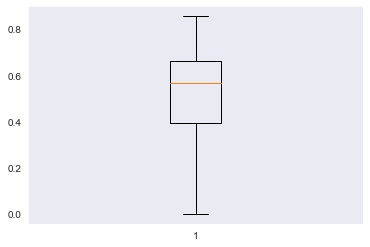

In [248]:
#EXT_SOURCE_2
plt.boxplot(appdata.EXT_SOURCE_2)
plt.show()

In [249]:
appdata["external_score"] = pd.qcut(appdata.EXT_SOURCE_2,[0,0.2,0.4,0.6,0.8,1],["Below 0.2","0.2-0.4","0.4-0.6","0.6-0.8","Above 0.8"])

Text(0.5, 0, 'External Score Range')

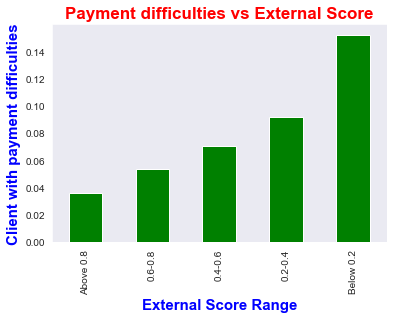

In [253]:
appdata.groupby(by= "external_score")["TARGET"].mean().sort_values().plot.bar(color = "green")
plt.title("Payment difficulties vs External Score", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("External Score Range",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [254]:
#OBS_30_CNT_SOCIAL_CIRCLE
appdata.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()


0.0      164931
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

Text(0.5, 0, 'Observable 30 Days DPD')

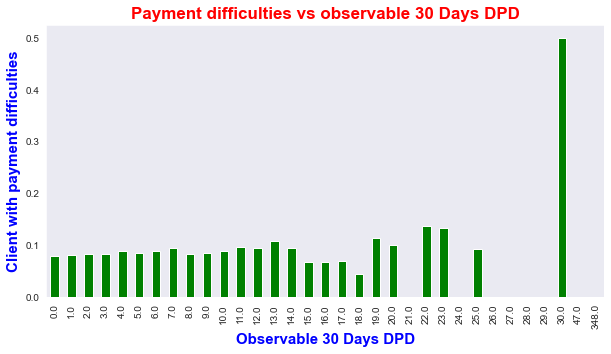

In [290]:
plt.figure(figsize=[10,5])
appdata.groupby(by= "OBS_30_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs observable 30 Days DPD", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Observable 30 Days DPD",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [285]:
appdata.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100


0.0      53.880024
1.0      15.892114
2.0       9.679654
3.0       6.573749
4.0       4.535122
5.0       3.077288
6.0       2.064642
7.0       1.412632
8.0       0.938503
9.0       0.637050
10.0      0.434131
11.0      0.272185
12.0      0.201619
13.0      0.130402
14.0      0.077396
15.0      0.053982
16.0      0.044551
17.0      0.023739
18.0      0.015934
19.0      0.014308
20.0      0.009756
21.0      0.009105
22.0      0.006504
23.0      0.004227
24.0      0.003902
25.0      0.003577
27.0      0.001626
29.0      0.000650
26.0      0.000325
28.0      0.000325
344.0     0.000325
47.0      0.000325
30.0      0.000325
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

Text(0.5, 0, 'Observable 60 days DPD')

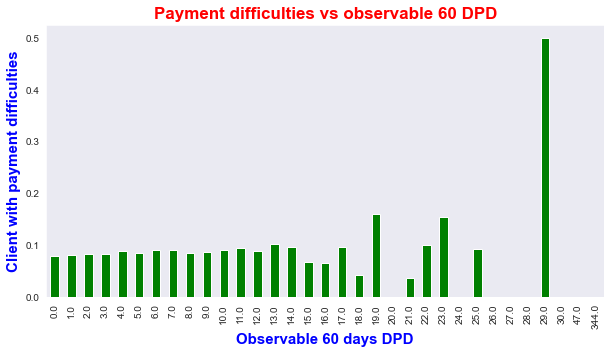

In [289]:
plt.figure(figsize=[10,5])
appdata.groupby(by= "OBS_60_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs observable 60 DPD", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Observable 60 days DPD",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [286]:
appdata.DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100


0.0     91.620137
1.0      7.102510
2.0      1.030857
3.0      0.194465
4.0      0.043901
5.0      0.006504
6.0      0.000976
7.0      0.000325
24.0     0.000325
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

Text(0.5, 0, 'Defaulted on 30 days DPD')

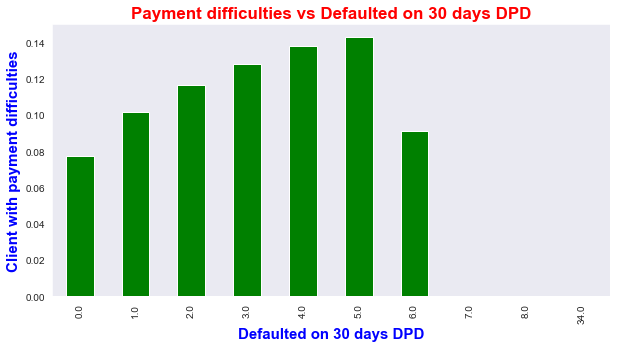

In [293]:
plt.figure(figsize=[10,5])
appdata.groupby(by= "DEF_30_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Defaulted on 30 days DPD", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Defaulted on 30 days DPD",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


Text(0.5, 0, 'Defaulted on 60 days DPD')

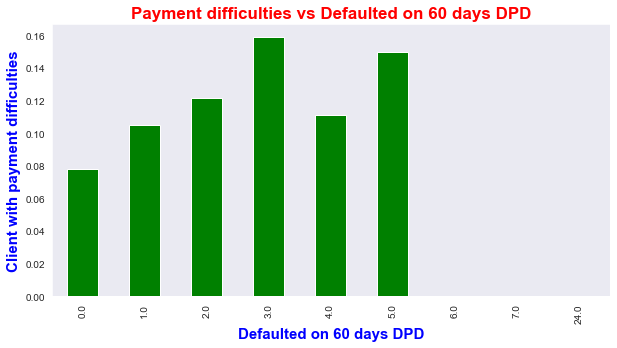

In [292]:
plt.figure(figsize=[10,5])
appdata.groupby(by= "DEF_60_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Defaulted on 60 days DPD", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Defaulted on 60 days DPD",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [302]:
appdata["Year_count_phone_changed"] = appdata.DAYS_LAST_PHONE_CHANGE.apply(lambda x : round (abs(x/365),1))

In [305]:
appdata.Year_count_phone_changed.value_counts()

0.0     49598
1.0      6460
1.3      6225
1.2      6222
0.8      6207
1.4      6146
0.9      6070
1.1      6007
1.5      5804
1.6      5724
0.7      5558
1.7      5452
1.8      5217
2.0      5207
1.9      5083
0.6      4899
2.1      4527
0.5      4495
4.2      4469
2.2      4343
4.1      4303
2.3      4154
4.4      4056
4.3      4049
2.4      3884
0.4      3881
4.7      3824
3.0      3807
4.8      3701
4.6      3587
4.5      3399
2.5      3390
2.9      3339
4.0      3303
3.1      3300
2.6      3297
2.8      3281
2.7      3272
5.0      3267
4.9      3241
0.1      3199
3.2      3169
5.1      3054
3.3      2948
3.8      2895
3.7      2887
5.2      2864
3.5      2854
3.4      2849
3.6      2847
0.3      2795
3.9      2789
5.3      2523
0.2      2394
5.4      2301
5.6      1936
5.5      1895
5.8      1759
5.7      1701
5.9      1678
6.0      1625
6.2      1616
6.1      1604
6.3      1548
6.7      1542
6.6      1524
6.4      1513
6.8      1497
6.5      1424
7.0      1423
6.9      1389
7.1   

In [310]:
appdata["Year_Group_Phone_changed"] = pd.cut(appdata.Year_count_phone_changed,[0,3,6,9,12],["Below 3 Yrs","(3-6)yrs","(6-9)yrs","Above 3 Yrs"])

Text(0, 0.5, 'Year Groups')

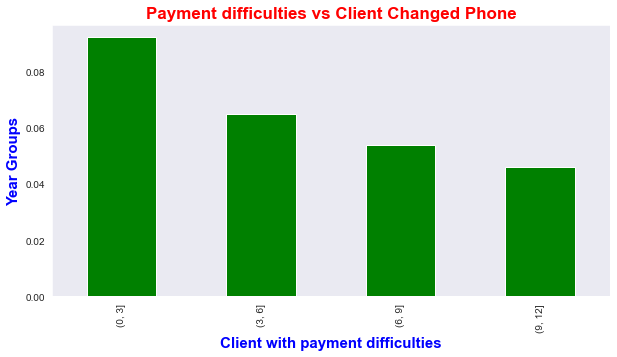

In [316]:
plt.figure(figsize=[10,5])
appdata.groupby(by= "Year_Group_Phone_changed")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Client Changed Phone", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("Year Groups",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [317]:
appdata.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)


0.0    0.994712
1.0    0.005073
2.0    0.000182
3.0    0.000029
4.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

Text(0.5, 0, 'Enquiries Count')

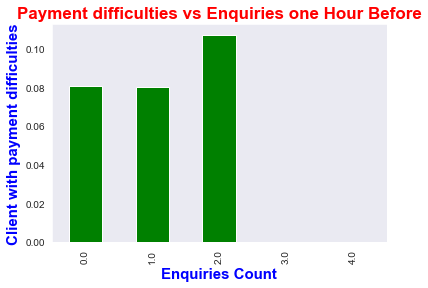

In [330]:
appdata.groupby(by= "AMT_REQ_CREDIT_BUREAU_HOUR")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Enquiries one Hour Before", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Enquiries Count",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [318]:
appdata.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)



0.0    0.995158
1.0    0.004201
2.0    0.000345
3.0    0.000146
4.0    0.000085
5.0    0.000029
6.0    0.000026
9.0    0.000007
8.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

Text(0.5, 0, 'Enquiries Count')

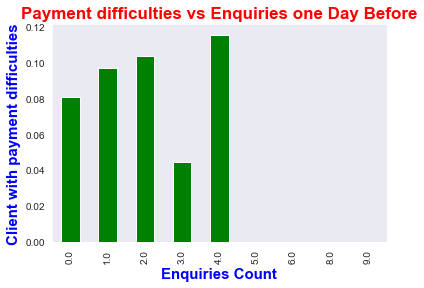

In [331]:
appdata.groupby(by= "AMT_REQ_CREDIT_BUREAU_DAY")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Enquiries one Day Before", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Enquiries Count",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [319]:
appdata.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)


0.0    0.972242
1.0    0.026692
2.0    0.000647
3.0    0.000189
4.0    0.000111
6.0    0.000065
5.0    0.000033
8.0    0.000016
7.0    0.000007
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

Text(0.5, 0, 'Enquiries Count')

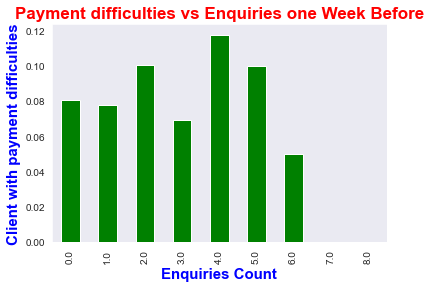

In [332]:
appdata.groupby(by= "AMT_REQ_CREDIT_BUREAU_WEEK")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Enquiries one Week Before", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Enquiries Count",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [320]:
appdata.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)

0.0     0.857699
1.0     0.107791
2.0     0.017515
3.0     0.006475
4.0     0.003499
5.0     0.001958
6.0     0.001115
7.0     0.000969
9.0     0.000670
8.0     0.000602
10.0    0.000429
11.0    0.000387
12.0    0.000250
13.0    0.000234
14.0    0.000130
15.0    0.000114
16.0    0.000075
17.0    0.000046
18.0    0.000020
19.0    0.000010
27.0    0.000003
22.0    0.000003
23.0    0.000003
24.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

Text(0.5, 0, 'Enquiries Count')

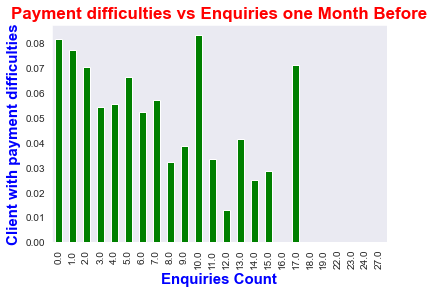

In [333]:
appdata.groupby(by= "AMT_REQ_CREDIT_BUREAU_MON")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Enquiries one Month Before", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Enquiries Count",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [322]:
appdata.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)


0.0      0.835534
1.0      0.110116
2.0      0.046867
3.0      0.005584
4.0      0.001548
5.0      0.000208
6.0      0.000091
8.0      0.000023
7.0      0.000023
19.0     0.000003
261.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Text(0.5, 0, 'Enquiries Count')

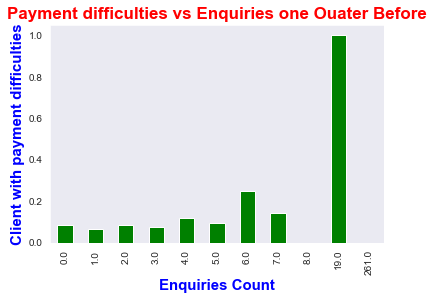

In [334]:
appdata.groupby(by= "AMT_REQ_CREDIT_BUREAU_QRT")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Enquiries one Ouater Before", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Enquiries Count",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [323]:
appdata.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)


1.0     0.341204
0.0     0.233491
2.0     0.163220
3.0     0.109355
4.0     0.067360
5.0     0.039192
6.0     0.022656
7.0     0.012582
8.0     0.006917
9.0     0.003564
11.0    0.000101
12.0    0.000098
10.0    0.000072
13.0    0.000062
14.0    0.000033
17.0    0.000023
15.0    0.000020
18.0    0.000013
19.0    0.000013
16.0    0.000010
25.0    0.000003
21.0    0.000003
22.0    0.000003
20.0    0.000003
23.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Text(0.5, 0, 'Enquiries Count')

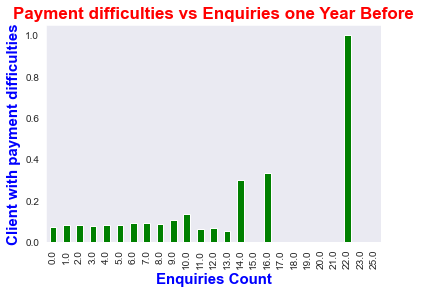

In [335]:
appdata.groupby(by= "AMT_REQ_CREDIT_BUREAU_YEAR")["TARGET"].mean().plot.bar(color = "green")
plt.title("Payment difficulties vs Enquiries one Year Before", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.ylabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.xlabel("Enquiries Count",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


In [336]:
prevdata

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


# Merging two data frame

In [339]:
merge_data = pd.merge(left=appdata,right=prevdata, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [340]:
merge_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_normal,Cash Street: low
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low


In [344]:
# SK_ID_PREV,SK_ID_CURR both columns are ID Column, So i will remove these column from the new data set 

merge_data.drop(["SK_ID_PREV","SK_ID_CURR"],inplace=True,axis = 1)




In [348]:
merge_data.NAME_CONTRACT_TYPE_y.value_counts()


Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE_y, dtype: int64

In [347]:
merge_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE',

In [366]:
merge_data.NAME_CONTRACT_TYPE_y.value_counts(normalize=True)


Cash loans         0.443350
Consumer loans     0.442283
Revolving loans    0.114146
XNA                0.000221
Name: NAME_CONTRACT_TYPE_y, dtype: float64

In [367]:
merge_data.NAME_CONTRACT_TYPE_y.mode()

0    Cash loans
dtype: object

In [368]:
merge_data.replace(to_replace="XNA",value=merge_data.NAME_CONTRACT_TYPE_y.mode()[0],inplace=True)

In [369]:
merge_data.NAME_CONTRACT_TYPE_y.value_counts(normalize=True)


Cash loans         0.443571
Consumer loans     0.442283
Revolving loans    0.114146
Name: NAME_CONTRACT_TYPE_y, dtype: float64

In [387]:
Compare = pd.pivot_table(merge_data,index="NAME_CONTRACT_TYPE_x",columns="NAME_CONTRACT_TYPE_y",values ="TARGET" )

Compare

NAME_CONTRACT_TYPE_y,Cash loans,Consumer loans,Revolving loans
NAME_CONTRACT_TYPE_x,,,
Cash loans,0.093558,0.079786,0.106988
Revolving loans,0.057490,0.051038,0.066294


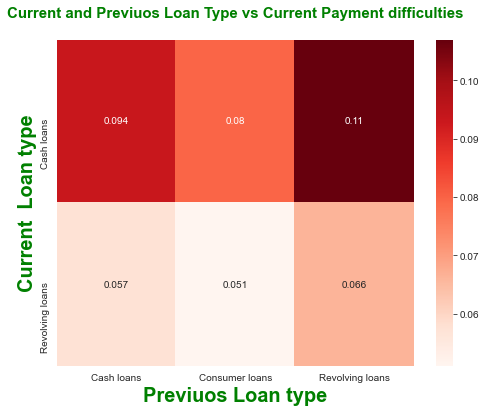

In [388]:
plt.figure(figsize=[8,6])
sns.heatmap(Compare,annot=True,cmap="Reds",)
plt.xlabel("Previuos Loan type", color= "Green",fontsize = 20,fontweight = "bold")
plt.ylabel("Current  Loan type", color= "Green",fontsize = 20,fontweight = "bold")
plt.title("Current and Previuos Loan Type vs Current Payment difficulties\n", color= "Green",fontsize = 15,fontweight = "bold")

plt.show()

In [389]:
merge_data.AMT_APPLICATION.value_counts(normalize=True)


0.00         2.301066e-01
45000.00     2.835607e-02
225000.00    2.611656e-02
135000.00    2.469051e-02
450000.00    2.320222e-02
                 ...     
36180.18     7.073632e-07
401395.50    7.073632e-07
215622.00    7.073632e-07
326664.81    7.073632e-07
114913.80    7.073632e-07
Name: AMT_APPLICATION, Length: 86766, dtype: float64

In [403]:
merge_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100
# XAP is almost is Almost 55% this cloumn is also not usefull

XAP                                 55.665024
Cash loans                          40.132319
Repairs                              1.423002
Other                                0.950130
Urgent needs                         0.511848
Buying a used car                    0.174648
Building a house or an annex         0.165806
Everyday expenses                    0.145151
Medicine                             0.132348
Payments on other loans              0.111268
Education                            0.094362
Journey                              0.073707
Purchase of electronic equipment     0.066068
Buying a new car                     0.062672
Wedding / gift / holiday             0.056660
Buying a home                        0.049586
Car repairs                          0.048879
Furniture                            0.046686
Buying a holiday home / land         0.032751
Business development                 0.025394
Gasification / water supply          0.017755
Buying a garage                   

In [407]:
merge_data.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100


Cash loans              50.599243
Consumer electronics    24.170670
Connectivity            16.860001
Furniture                3.463674
Construction             1.797905
Clothing                 1.407370
Industry                 1.171889
Auto technology          0.288604
Jewelry                  0.149041
MLM partners             0.065148
Tourism                  0.026455
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [416]:
#to check whether  the client is repeater or new
merge_data.NAME_CLIENT_TYPE.value_counts(normalize=True)


Repeater      0.734018
New           0.183589
Refreshed     0.081301
Cash loans    0.001091
Name: NAME_CLIENT_TYPE, dtype: float64

Text(0, 0.5, 'Client Type')

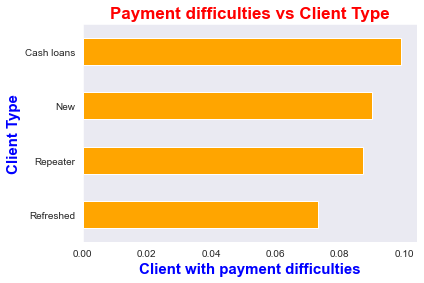

In [417]:
merge_data.groupby(by= "NAME_CLIENT_TYPE")["TARGET"].mean().sort_values().plot.barh(color = "orange")
plt.title("Payment difficulties vs Client Type", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("Client Type",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


# ----------------------------------------------------------

Text(0, 0.5, 'Previous application Status')

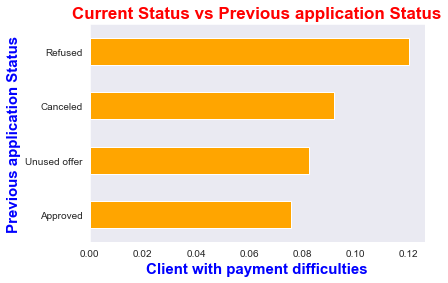

In [423]:
merge_data.groupby(by= "NAME_CONTRACT_STATUS")["TARGET"].mean().sort_values().plot.barh(color = "orange")

plt.title("Current Status vs Previous application Status", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("Previous application Status",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})



Text(0, 0.5, 'Payment Method in Previous application')

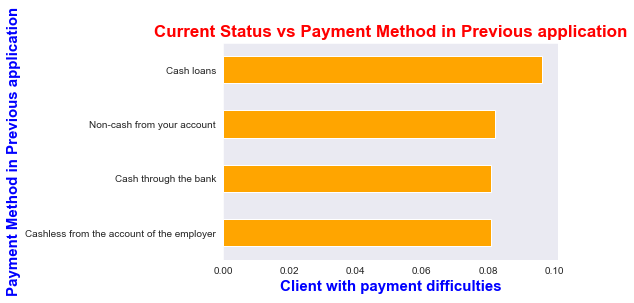

In [424]:
merge_data.groupby(by= "NAME_PAYMENT_TYPE")["TARGET"].mean().sort_values().plot.barh(color = "orange")

plt.title("Current Status vs Payment Method in Previous application", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("Payment Method in Previous application",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})



In [429]:
merge_data.groupby(by= "CHANNEL_TYPE")["TARGET"].mean().sort_values()

CHANNEL_TYPE
Car dealer                    0.051724
Channel of corporate sales    0.063751
Stone                         0.073697
Regional / Local              0.076055
Country-wide                  0.082560
Credit and cash offices       0.090110
Contact center                0.102698
AP+ (Cash loan)               0.128265
Name: TARGET, dtype: float64

Text(0, 0.5, 'Previous application Channel Type')

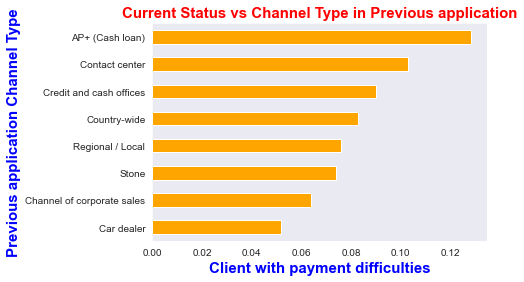

In [430]:
merge_data.groupby(by= "CHANNEL_TYPE")["TARGET"].mean().sort_values().plot.barh(color = "orange")
plt.title("Current Status vs Channel Type in Previous application", fontdict = {'fontsize':15,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("Previous application Channel Type",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})


Text(0, 0.5, 'The industry of the seller')

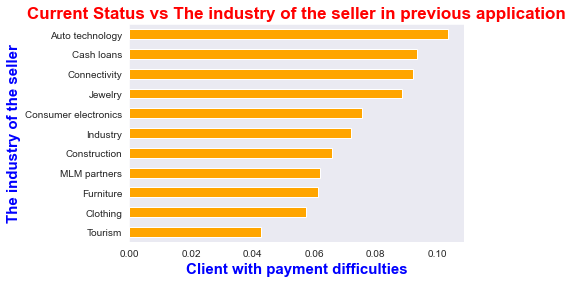

In [427]:
merge_data.groupby(by= "NAME_SELLER_INDUSTRY")["TARGET"].mean().sort_values().plot.barh(color = "orange")
plt.title("Current Status vs The industry of the seller in previous application", fontdict = {'fontsize':17,'fontweight':"bold",'color' : 'red'})
plt.xlabel("Client with payment difficulties",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
plt.ylabel("The industry of the seller",fontdict={'fontsize':15,'fontweight':"bold",'color' : 'Blue'})
